Project Description  
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).  

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.  
Attribute Information  
Input variables (based on physicochemical tests):  
1 - fixed acidity  
2 - volatile acidity  
3 - citric acid  
4 - residual sugar  
5 - chlorides  
6 - free sulfur dioxide  
7 - total sulfur dioxide  
8 - density  
9 - pH  
10 - sulphates  
11 - alcohol  
Output variable (based on sensory data):  
12 - quality (score between 0 and 10)  


What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.  
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.  


You need to build a classification model.   
Inspiration  
Use machine learning to determine which physiochemical properties make a wine 'good'!


In [169]:
#importing the very basic libraries

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [170]:
#importing our dataset

data = pd.read_csv('winequality-red.csv')
data.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [171]:
data.shape

(1599, 12)

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Every feature is float/int which is as expected

In [173]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [174]:
for col in data.columns:
    print(data[col].value_counts())
    print('\n\n\n')

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64




0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64




0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64




2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64




0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64




6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0  

### Our data looks good

In [175]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## All the features are contineous. But the mean and std difference is very high which means our data is not fit to proceed further. Lets check the distributon.

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

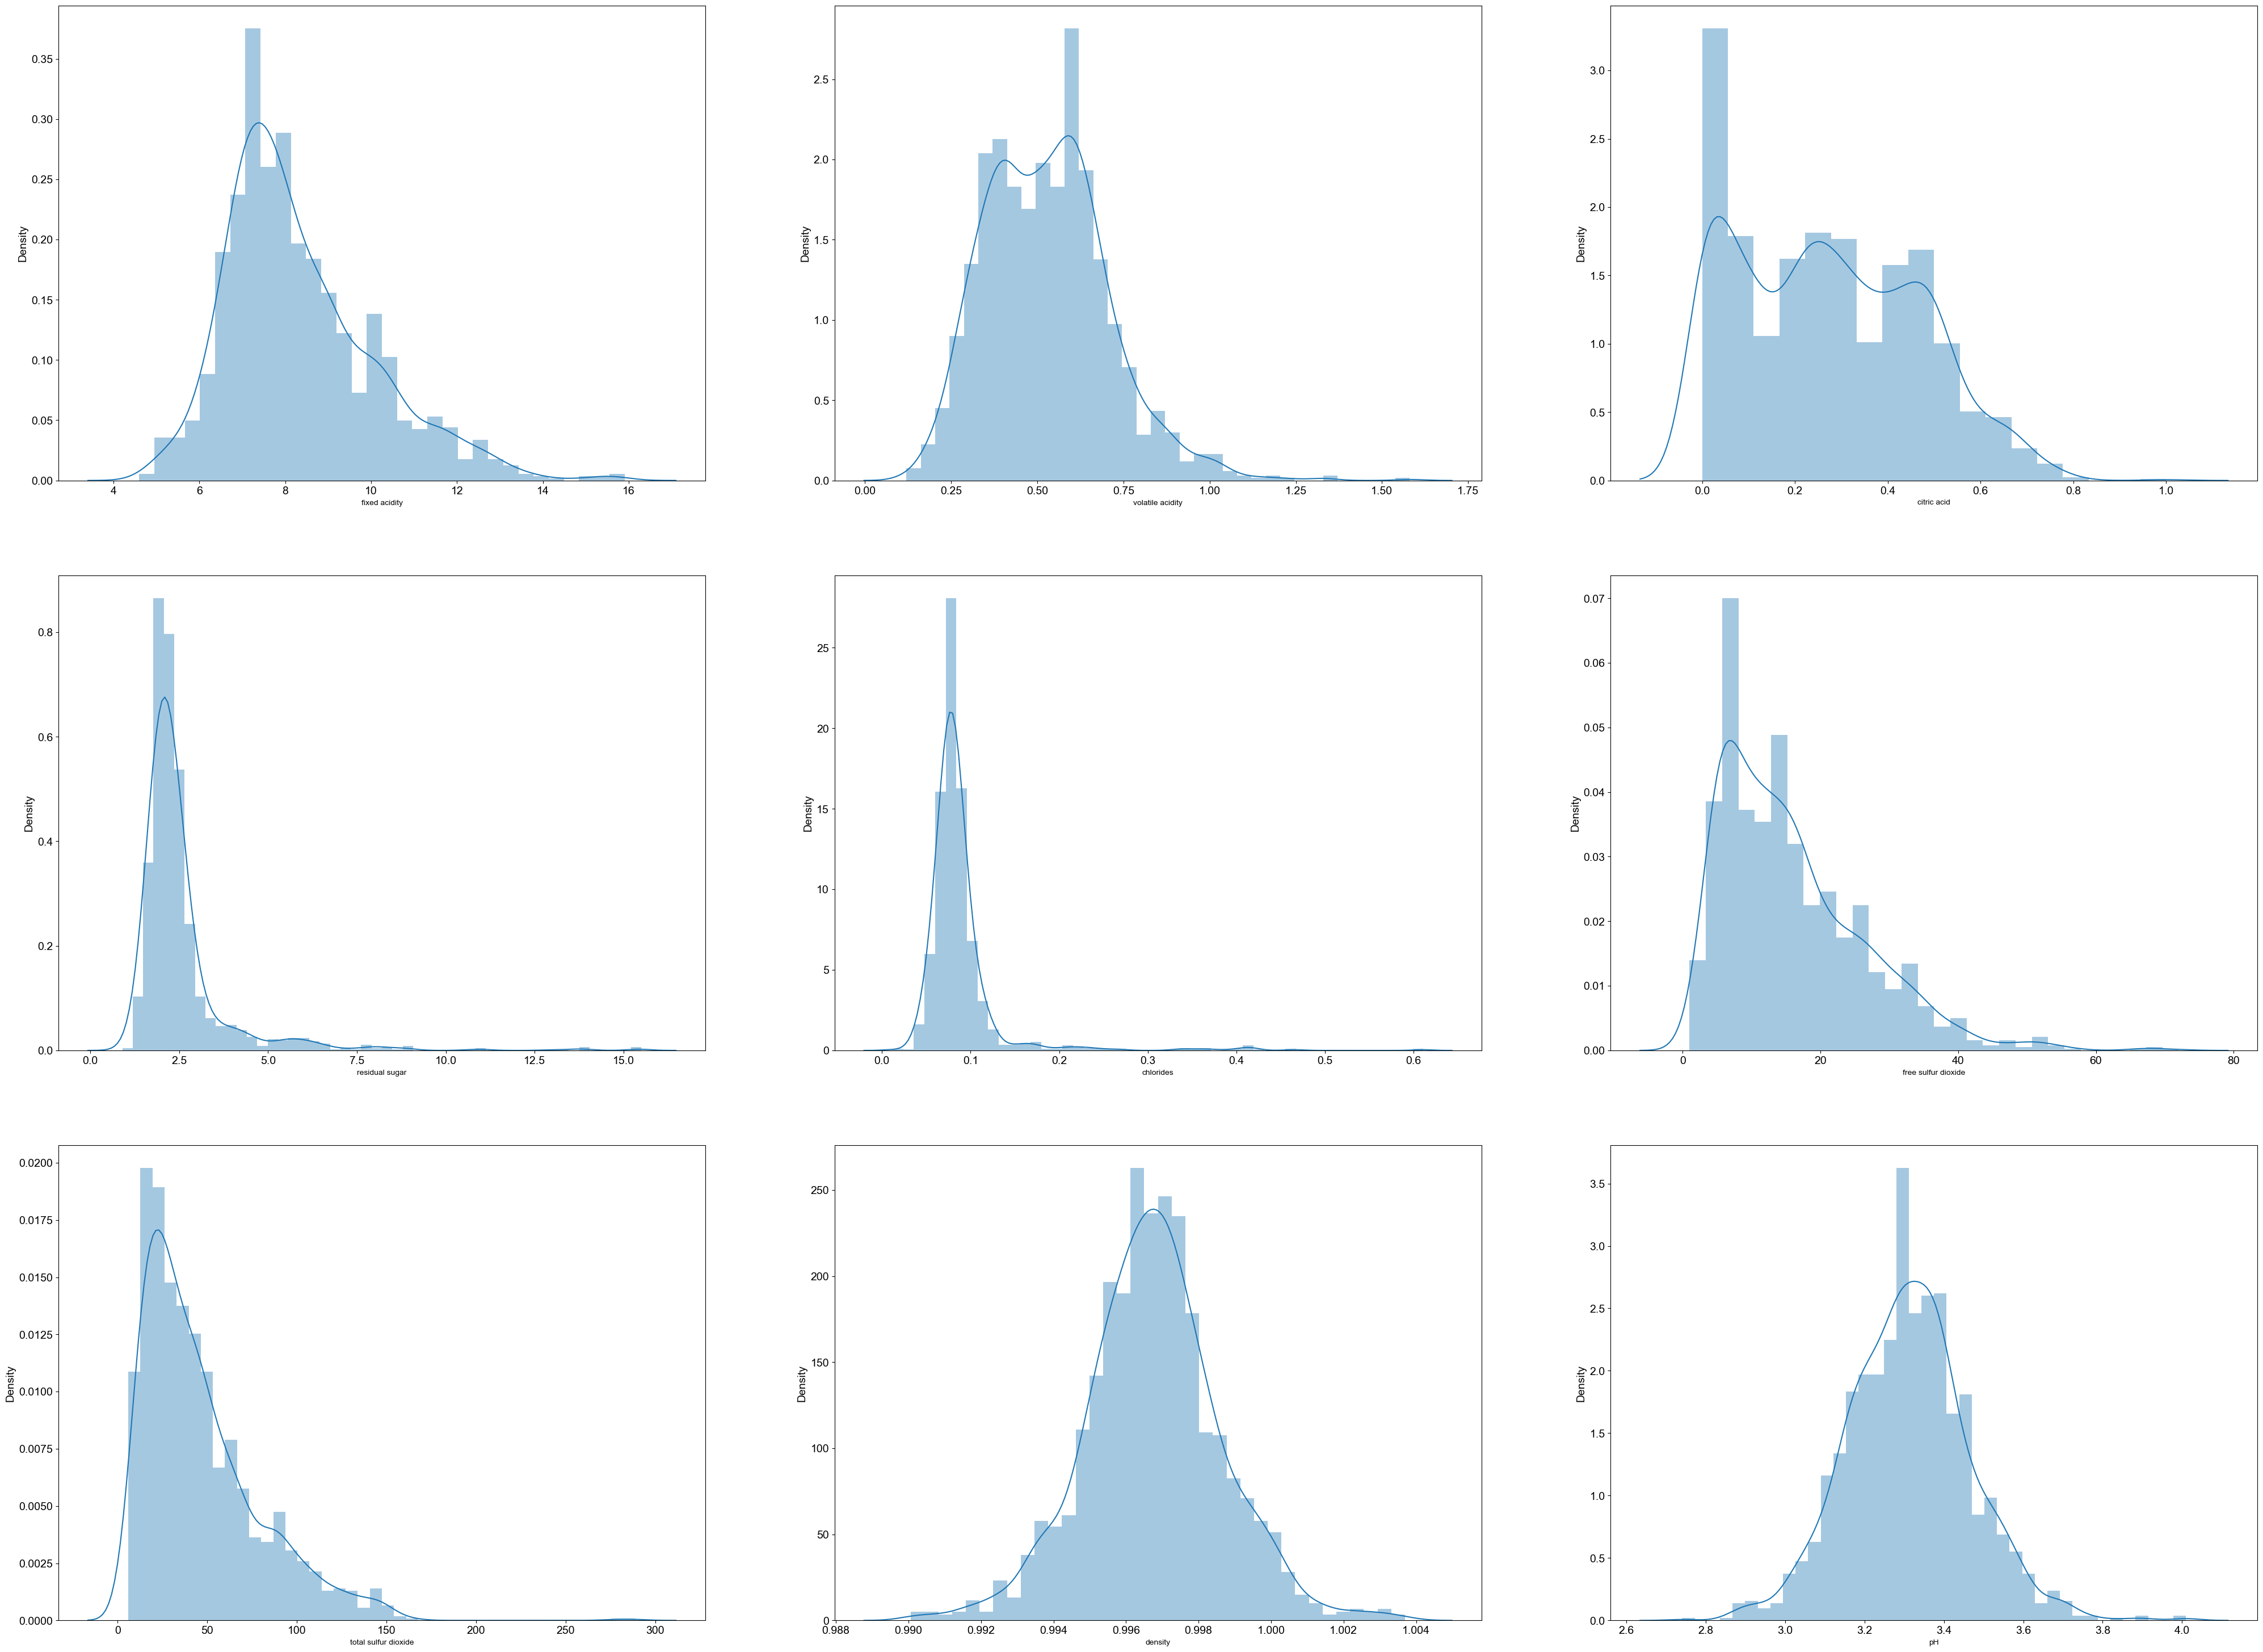

In [177]:
plt.figure(figsize=(50,50), facecolor='white')
no_of_plots = 1

for column in data:
    if no_of_plots<=9:
        ax = plt.subplot(4,3,no_of_plots)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=10)
        
    no_of_plots+=1
    
plt.show()

Observations:
- Ignore the last plot since it is our label
- We can see our data is rightly skewed for almost every feature. We will fix this using iqr method.

### First we will plot box plot

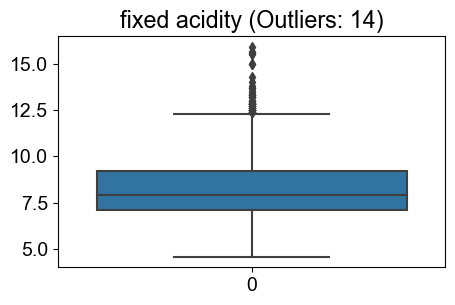

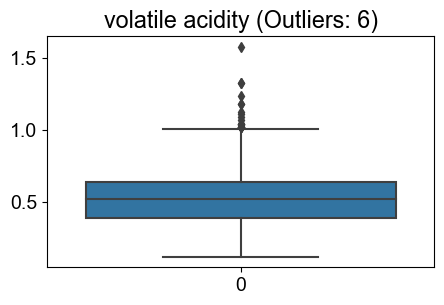

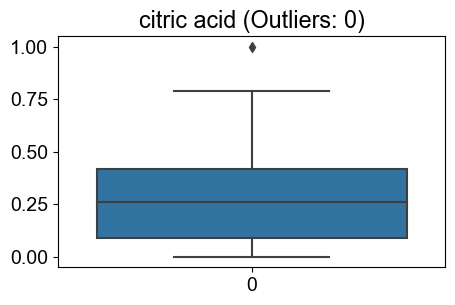

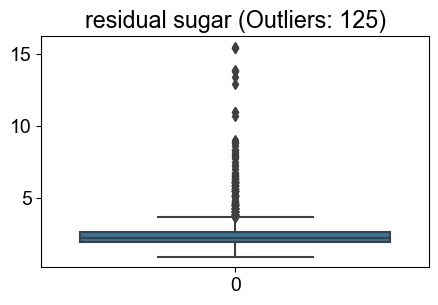

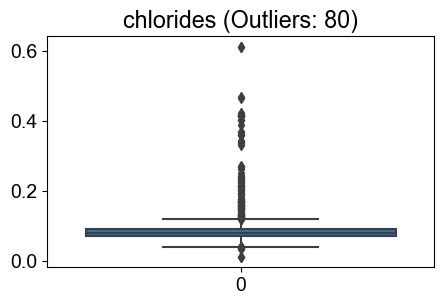

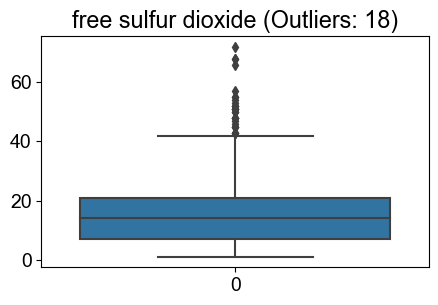

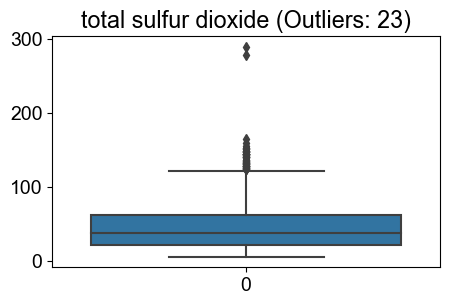

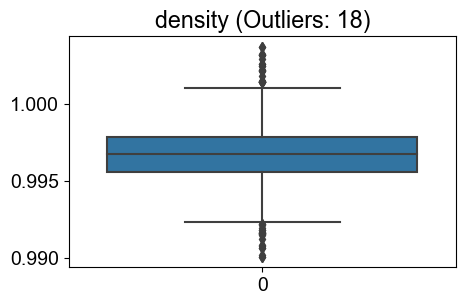

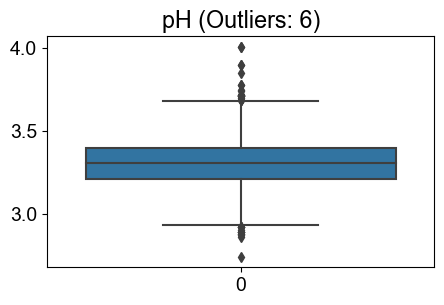

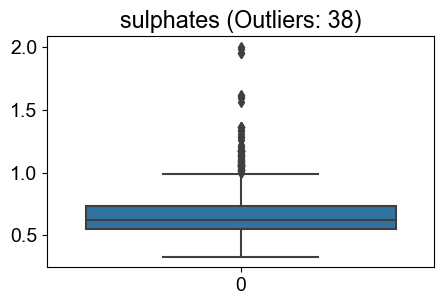

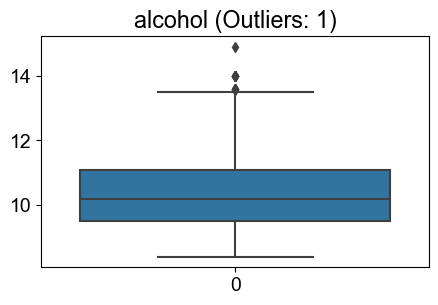

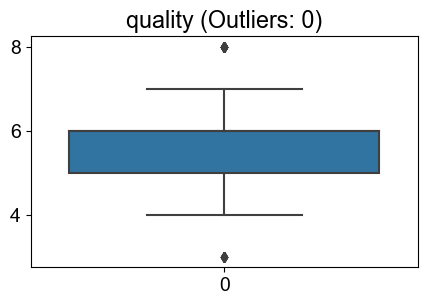

In [178]:
for i in data.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(data[i])
    
    # Add outliers count annotations
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 2 * iqr
    upper_bound = q3 + 2 * iqr
    outliers = len(data[(data[i] < lower_bound) | (data[i] > upper_bound)])
    
    plt.title(f'{i} (Outliers: {outliers})')
    plt.show()


In [179]:
data.shape

(1599, 12)

## We can see outliers and we will remove those
- We cannot use the basic formula for removing the outliers i.e.,(q1-1.5*iqr) because we will loose too much data. Hence we will change the constant to 2

1599 rows

In [180]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3-q1
iqr
#we only need bmi

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64

In [181]:

fixed_acidity_upper_range = q3['fixed acidity'] + (2*iqr['fixed acidity'])

index_fixed_acidity_upper = np.where(data['fixed acidity']>fixed_acidity_upper_range)

data = data.drop(data.index[index_fixed_acidity_upper])
data.reset_index()
data.shape

(1585, 12)

In [182]:

volatile_acidity_upper_range = q3['volatile acidity'] + (2*iqr['volatile acidity'])

index_volatile_acidity_upper = np.where(data['volatile acidity']>volatile_acidity_upper_range)

data = data.drop(data.index[index_volatile_acidity_upper])
data.reset_index()
data.shape

(1579, 12)

In [183]:

residual_sugar_upper_range = q3['residual sugar'] + (1.5*iqr['residual sugar'])

index_residual_sugar_upper = np.where(data['residual sugar']>residual_sugar_upper_range)

data = data.drop(data.index[index_residual_sugar_upper])
data.reset_index()
data.shape

(1432, 12)

In [184]:

chlorides_upper_range = q3['chlorides'] + (2*iqr['chlorides'])

index_chlorides_upper_range = np.where(data['chlorides']>chlorides_upper_range)

data = data.drop(data.index[index_chlorides_upper_range])
data.reset_index()
data.shape

(1365, 12)

In [185]:

free_sulfur_upper_range = q3['free sulfur dioxide'] + (1.5*iqr['free sulfur dioxide'])

index_free_sulfur_upper_range = np.where(data['free sulfur dioxide']>free_sulfur_upper_range)

data = data.drop(data.index[index_free_sulfur_upper_range])
data.reset_index()
data.shape

(1349, 12)

In [186]:

total_sulfur_upper_range = q3['total sulfur dioxide'] + (1.5*iqr['total sulfur dioxide'])

index_total_sulfur_upper_range = np.where(data['total sulfur dioxide']>total_sulfur_upper_range)

data = data.drop(data.index[index_total_sulfur_upper_range])
data.reset_index()
data.shape

(1312, 12)

In [187]:

density_upper_range = q3['density'] + (2*iqr['density'])
density_lower_range = q1['density'] - (2*iqr['density'])

index_density_upper_range = np.where(data['density']>density_upper_range)
index_density_lower_range = np.where(data['density']<density_lower_range)

data = data.drop(data.index[index_density_upper_range])
data = data.drop(data.index[index_density_lower_range])
data.reset_index()
data.shape

(1306, 12)

In [188]:

pH_upper_range = q3['pH'] + (2*iqr['pH'])

index_pH_upper_range = np.where(data['pH']>pH_upper_range)

data = data.drop(data.index[index_pH_upper_range])
data.reset_index()
data.shape

(1301, 12)

In [189]:

sulphates_upper_range = q3['sulphates'] + (2*iqr['sulphates'])

index_sulphates_upper_range = np.where(data['sulphates']>sulphates_upper_range)

data = data.drop(data.index[index_sulphates_upper_range])
data.reset_index()
data.shape

(1289, 12)

In [190]:

alcohol_upper_range = q3['alcohol'] + (2*iqr['alcohol'])

index_alcohol_upper_range = np.where(data['alcohol']>alcohol_upper_range)

data = data.drop(data.index[index_alcohol_upper_range])
data.reset_index()
data.shape

(1289, 12)

In [191]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000
mean,8.245306,0.523092,0.254880,2.191117,0.078602,14.874321,41.776571,0.996588,3.322933,0.637455,10.421412,5.656323
std,1.635698,0.170007,0.187686,0.446897,0.015373,8.815819,26.024619,0.001720,0.145149,0.121761,1.025948,0.782550
min,4.900000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.700000,3.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,8.000000,22.000000,0.995500,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.240000,2.100000,0.078000,13.000000,35.000000,0.996600,3.320000,0.620000,10.200000,6.000000
75%,9.100000,0.630000,0.400000,2.500000,0.087000,20.000000,55.000000,0.997600,3.410000,0.710000,11.100000,6.000000
max,13.300000,1.115000,0.750000,3.650000,0.128000,42.000000,122.000000,1.001400,3.780000,1.080000,14.000000,8.000000


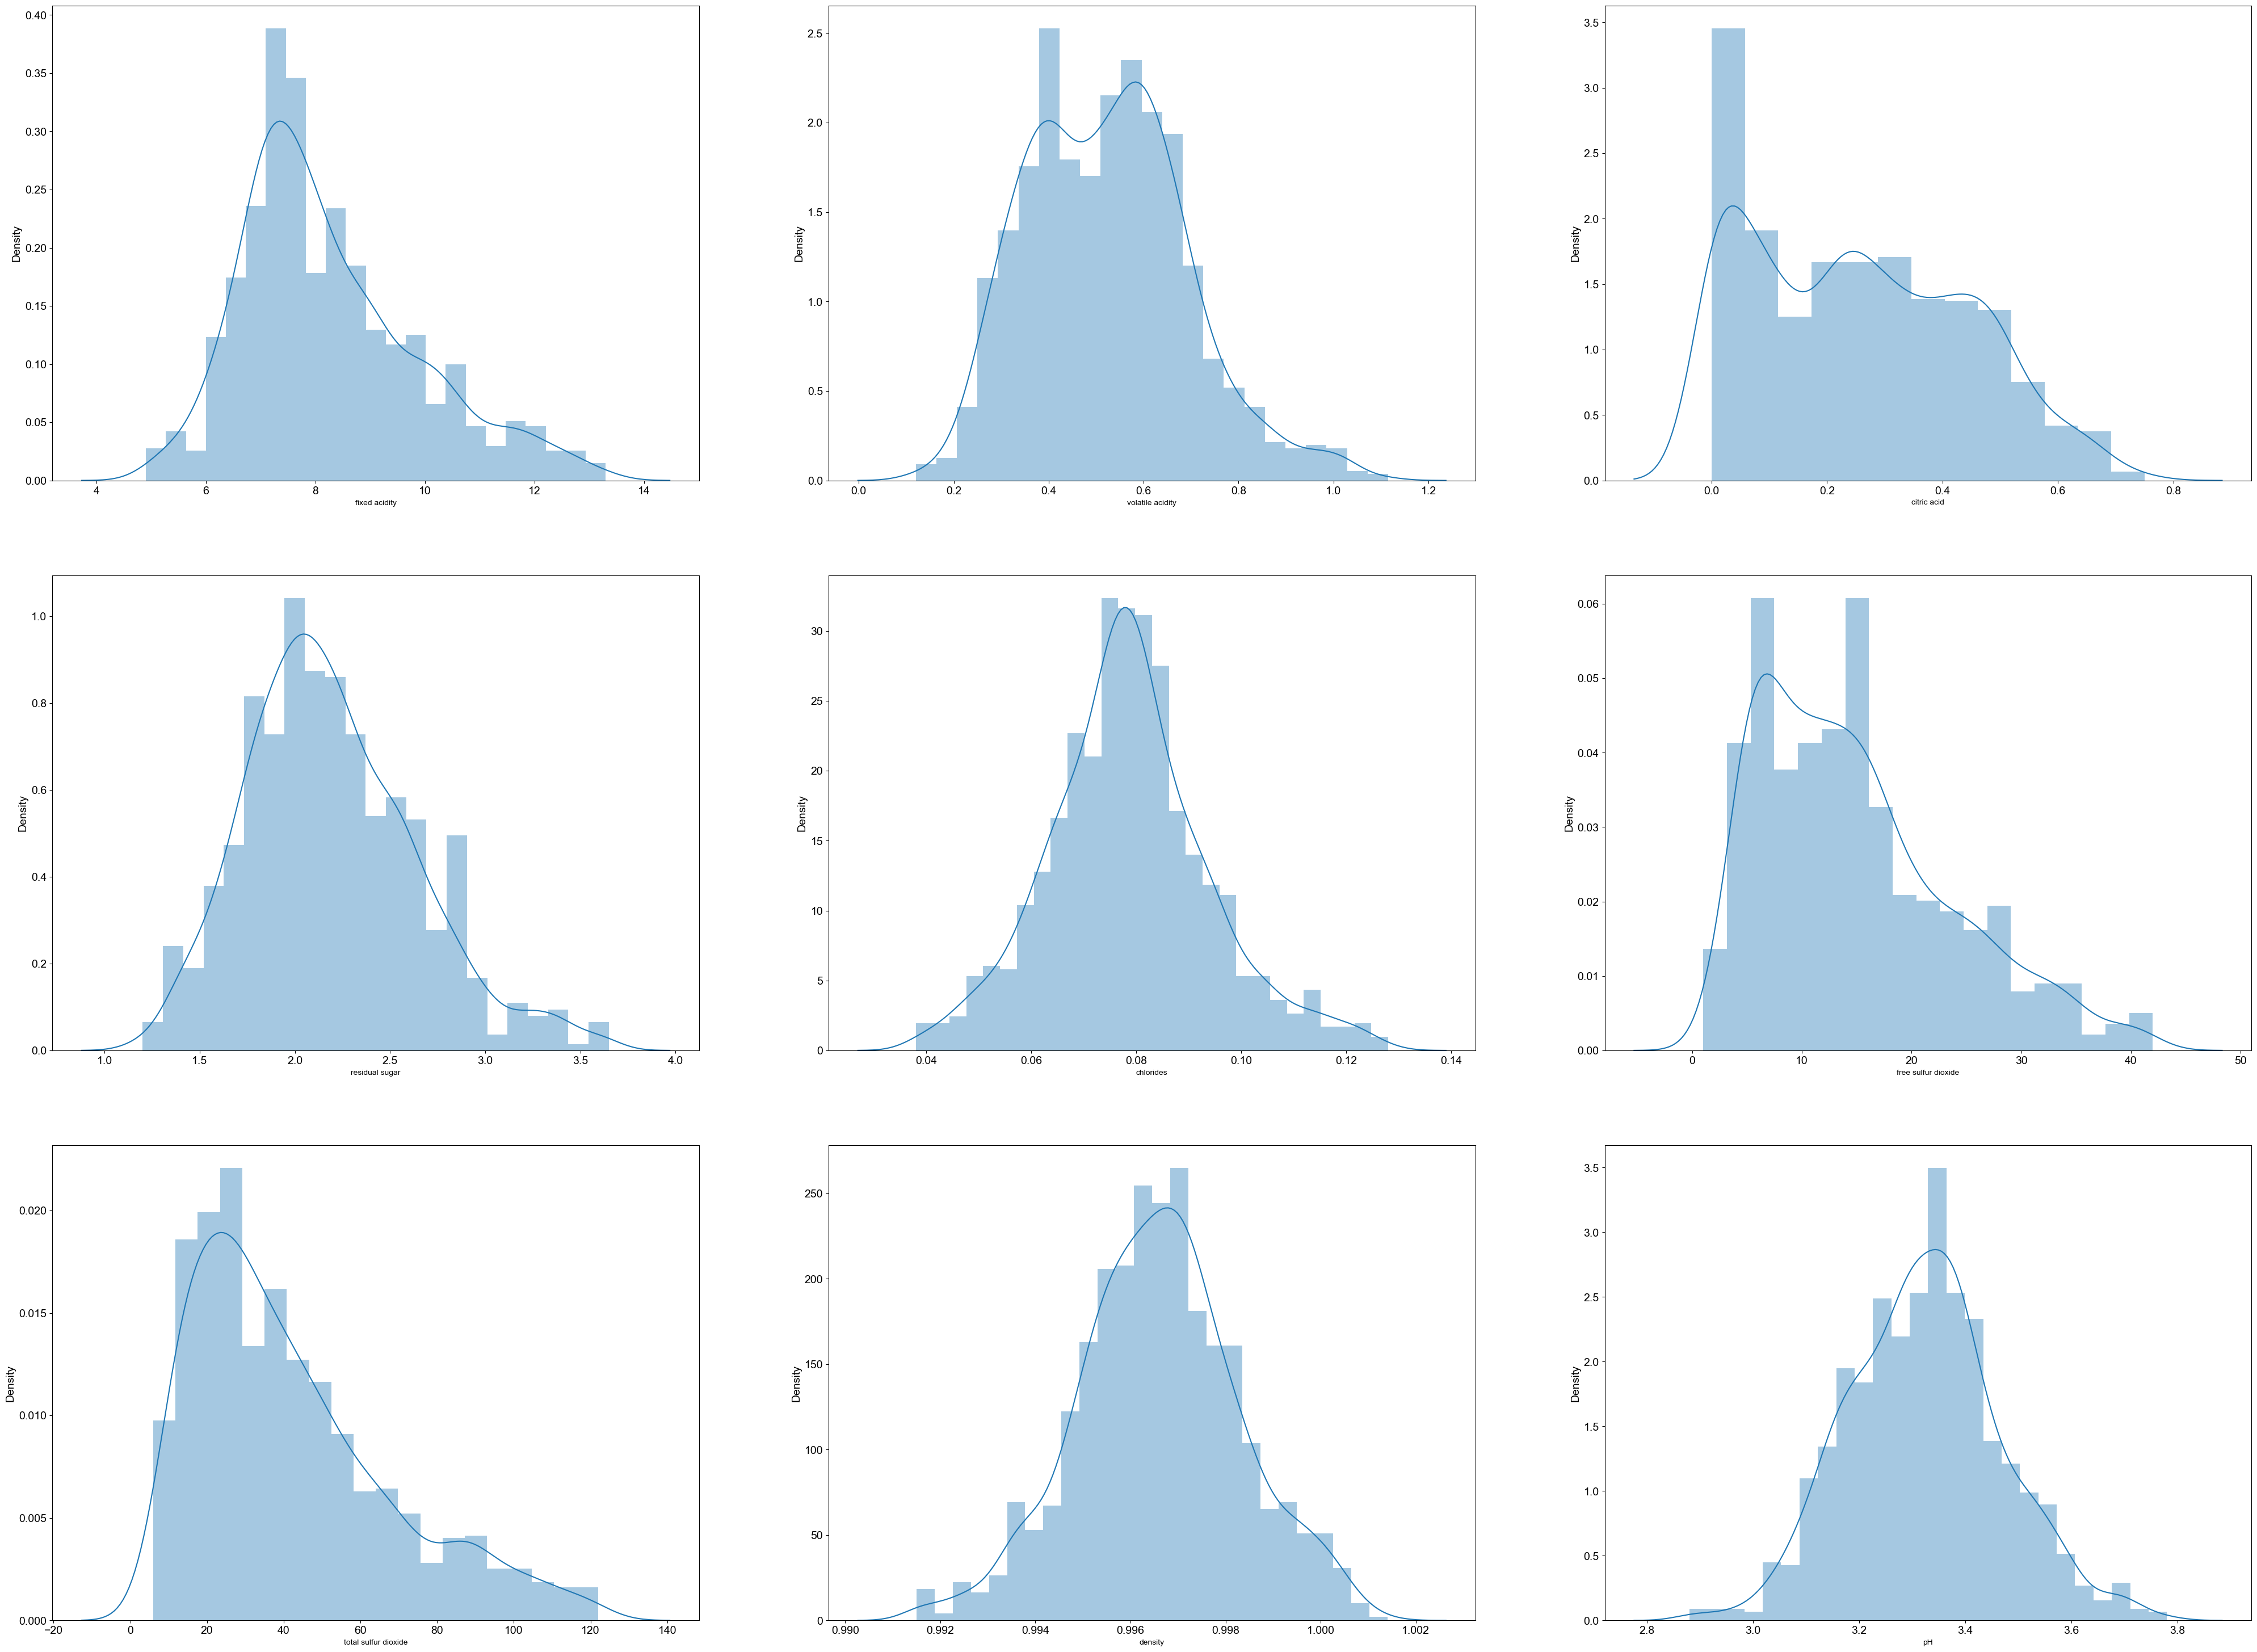

In [192]:
plt.figure(figsize=(50,50), facecolor='white')
no_of_plots = 1

for column in data:
    if no_of_plots<=9:
        ax = plt.subplot(4,3,no_of_plots)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=10)
        
    no_of_plots+=1
    
plt.show()

### Our data is looking much better

##### Lets convert our label to 0 or 1. 0 means poor, 1 means good.
- quality 0 to 6 = 0
- quality 7 and above = 1

In [193]:
index_vals_0 = np.where(data['quality']<=6)
len(index_vals_0[0])

1119

In [194]:
index_vals_1 = np.where(data['quality']>6)
len(index_vals_1[0])

170

In [195]:
def map_quality(value):
    return 0 if value <= 6 else 1

data['quality'] = data['quality'].apply(map_quality)

In [196]:
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,0


In [197]:
# lets visualize our data

In [198]:
x = data.drop(columns='quality')
y = data.quality

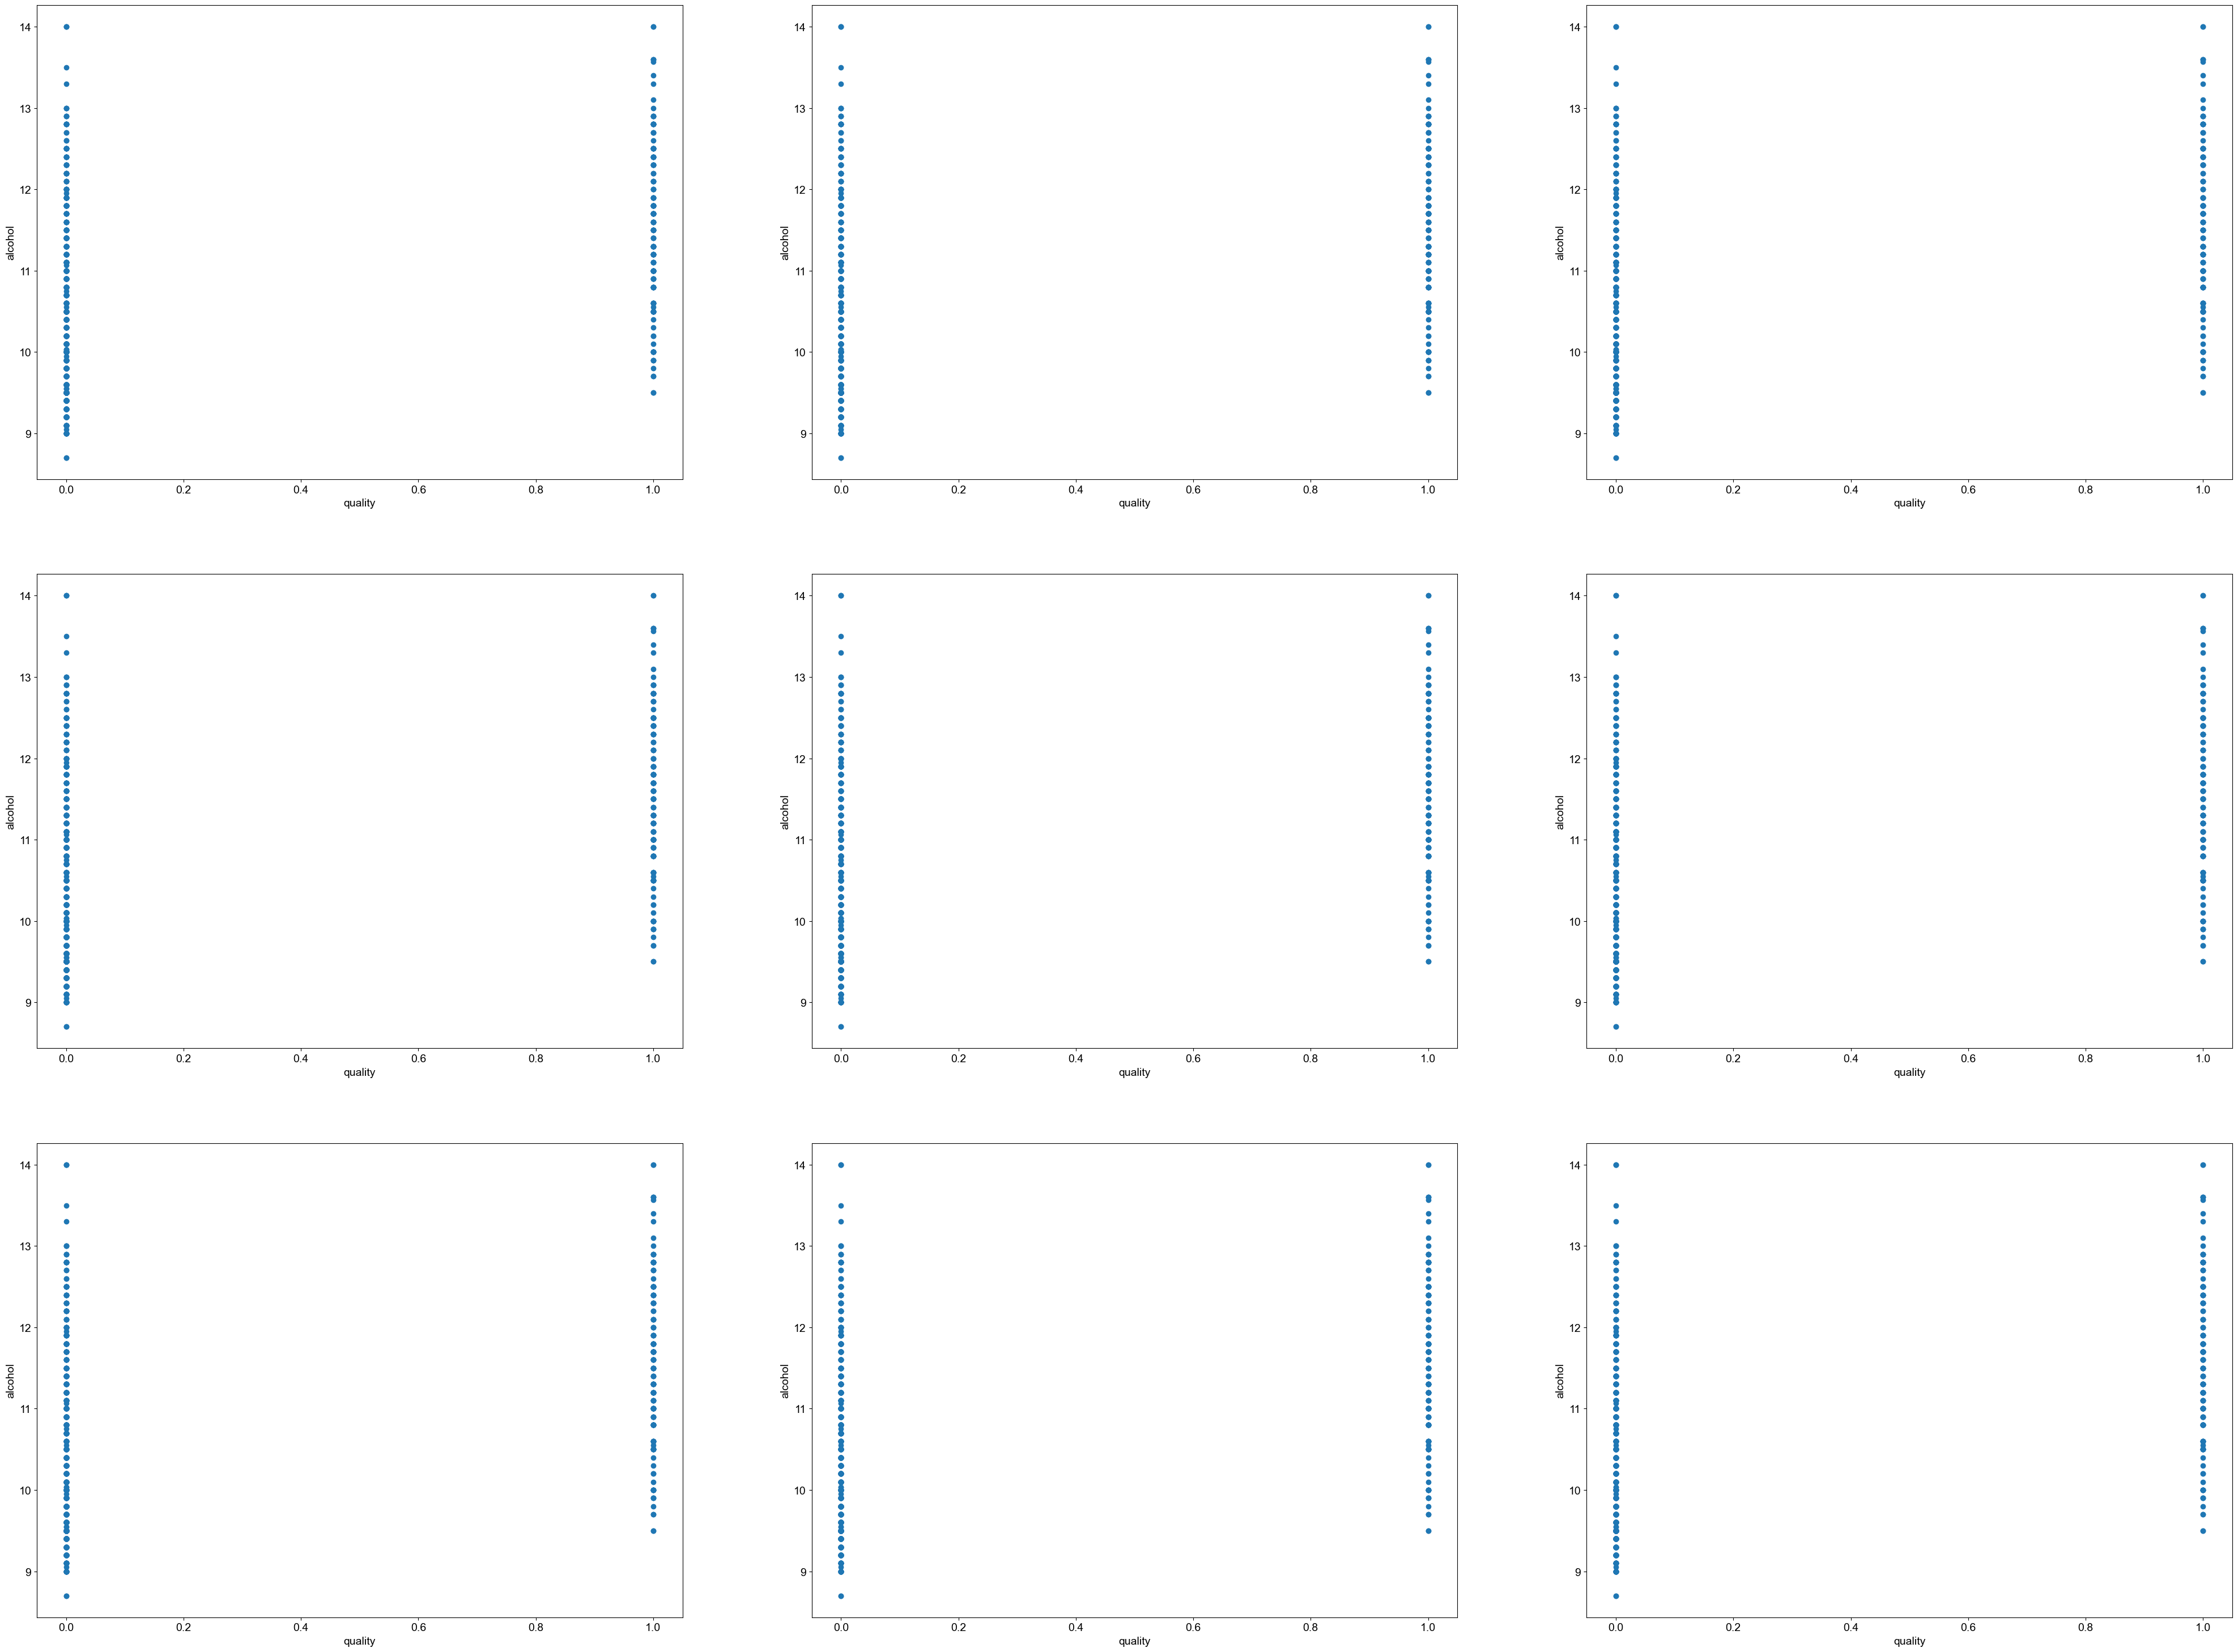

In [207]:
plt.figure(figsize=(50,50), facecolor='white')
no_of_plots = 1

for column in data:
    if no_of_plots<=9:
        ax = plt.subplot(4,3,no_of_plots)
        plt.scatter(y,x[col])
        plt.ylabel(col)
        plt.xlabel('quality')
        
    no_of_plots+=1
    
plt.show()

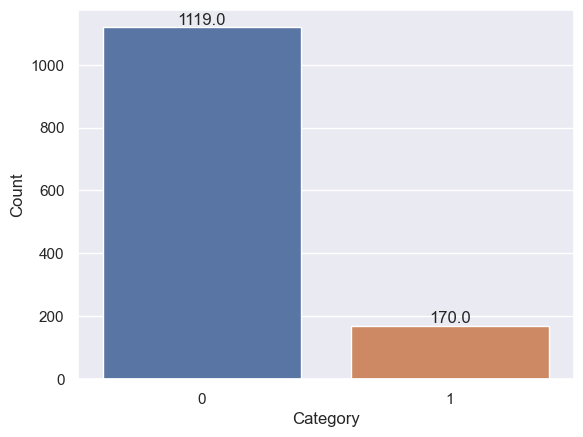

In [219]:
sns.set(style="darkgrid")  # Optional: Set a different style

# Create the count plot
ax = sns.countplot(x=y, data=data)

# Add count labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Add labels if needed
plt.xlabel('Category')
plt.ylabel('Count')

# Show the plot
plt.show()